In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

# 1. Understanding the Dataset
a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [2]:
df = pd.read_csv(r"C:\Users\OMKAR UTTEKAR\OneDrive\Documents\bank_marketing_updated_v1.csv", header = 2)
df.head(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45213 entries, 0 to 45212
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   banking marketing  45213 non-null  object
 1   Unnamed: 1         45192 non-null  object
 2   Unnamed: 2         45213 non-null  object
 3   Unnamed: 3         45212 non-null  object
 4   Unnamed: 4         45213 non-null  object
 5   Unnamed: 5         45212 non-null  object
 6   Unnamed: 6         45213 non-null  object
 7   Unnamed: 7         45212 non-null  object
 8   Unnamed: 8         45213 non-null  object
 9   Unnamed: 9         45212 non-null  object
 10  Unnamed: 10        45213 non-null  object
 11  Unnamed: 11        45212 non-null  object
 12  Unnamed: 12        45163 non-null  object
 13  Unnamed: 13        45213 non-null  object
 14  Unnamed: 14        45212 non-null  object
 15  Unnamed: 15        45212 non-null  object
 16  Unnamed: 16        45212 non-null  objec

In [3]:
# Change day and month to datetime column
df['date'] = df['day'].astype(str) + '/' + df['month']
df['date'] = pd.to_datetime(df['date'])
df.head(3)

C:\Users\OMKAR UTTEKAR\AppData\Local\Temp\ipykernel_12776\701040285.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05


In [4]:
# Summary of the data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,45211.0,22606.0,1.0,11303.5,22606.0,33908.5,45211.0,13051.435847
age,45191.0,40.935651,18.0,33.0,39.0,48.0,95.0,10.619198
salary,45211.0,57006.171065,0.0,20000.0,60000.0,70000.0,120000.0,32085.718415
balance,45211.0,1362.272058,-8019.0,72.0,448.0,1428.0,102127.0,3044.765829
day,45211.0,15.806419,1.0,8.0,16.0,21.0,31.0,8.322476
campaign,45211.0,2.763841,1.0,1.0,2.0,3.0,63.0,3.098021
pdays,45211.0,40.197828,-1.0,-1.0,-1.0,-1.0,871.0,100.128746
previous,45211.0,0.580323,0.0,0.0,0.0,0.0,275.0,2.303441
date,45161,2017-06-20 04:55:44.514072064,2017-01-06 00:00:00,2017-05-09 00:00:00,2017-06-04 00:00:00,2017-08-05 00:00:00,2017-12-31 00:00:00,NaN


In [5]:
# Check for Missing Values
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
date          50
dtype: int64

In [6]:
# Check the Data Types of All Columns
df.dtypes

customerid             int64
age                  float64
salary                 int64
balance                int64
marital               object
jobedu                object
targeted              object
default               object
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration              object
campaign               int64
pdays                  int64
previous               int64
poutcome              object
response              object
date          datetime64[ns]
dtype: object

In [7]:
# Check for Duplicate Rows
df.duplicated().sum()

0

In [8]:
# number of rows and columns
df.shape


(45211, 20)

# b. Inspect for any instances of missing values, outliers, or data inconsistencies.

In [15]:
missing_values = df_cleaned.isnull().sum()
missing_values

1
customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [9]:
#  Check for Missing Values
missing_values = df.isnull().sum()

#  Check for Outliers using IQR method
Q1 = df[["age","salary","balance","campaign","pdays","previous"]].quantile(0.25)
Q3 = df[["age","salary","balance","campaign","pdays","previous"]].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[["age","salary","balance","campaign","pdays","previous"]] < (Q1 - 1.5 * IQR)) | (df[["age","salary","balance","campaign","pdays","previous"]] > (Q3 + 1.5 * IQR))).sum()

# Check for Data Inconsistencies
# Example: Inspect unique values in categorical columns
inconsistencies = {}
for column in df.select_dtypes(include='object').columns:
    inconsistencies[column] = df[column].unique()

# Display results
print("Missing Values:\n", missing_values)
print("\nOutliers present in specific column:\n", outliers)
print("\nData Inconsistencies:\n", inconsistencies)

Missing Values:
 customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
date          50
dtype: int64

Outliers present in specific column:
 age          487
salary         0
balance     4729
campaign    3064
pdays       8257
previous    8257
dtype: int64

Data Inconsistencies:
 {'marital': array(['married', 'single', 'divorced'], dtype=object), 'jobedu': array(['management,tertiary', 'technician,secondary',
       'entrepreneur,secondary', 'blue-collar,unknown', 'unknown,unknown',
       'entrepreneur,tertiary', 'retired,primary', 'admin.,secondary',
       'technician,unknown', 'services,secondary', 'admin.,unknown',
       'blue-collar,primary', 'blue-collar,secondary',
       'management,secondary', 'retired,secondary'

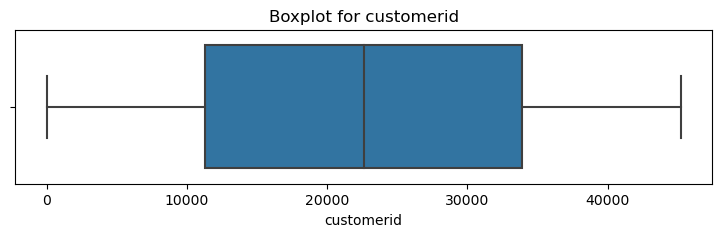

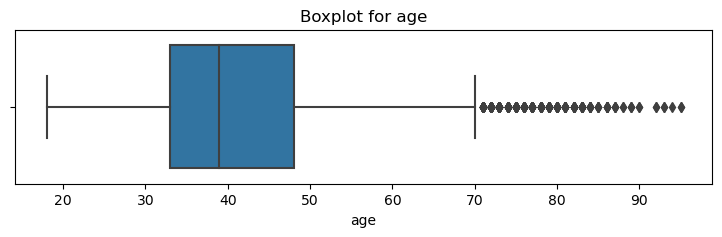

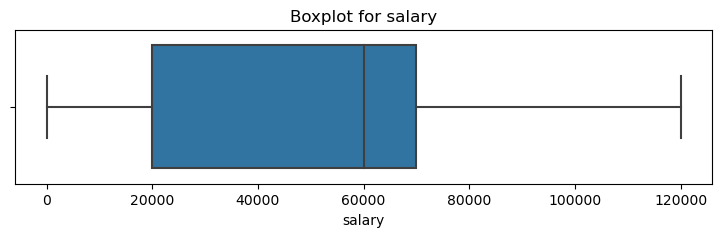

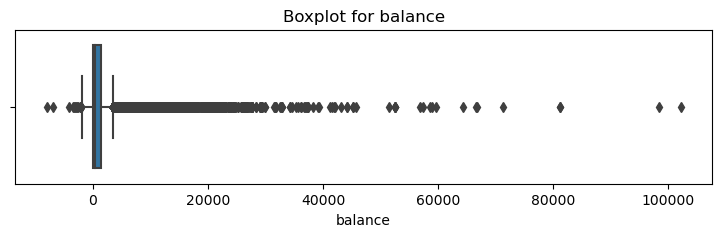

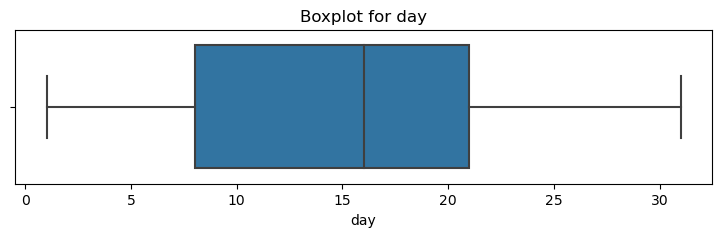

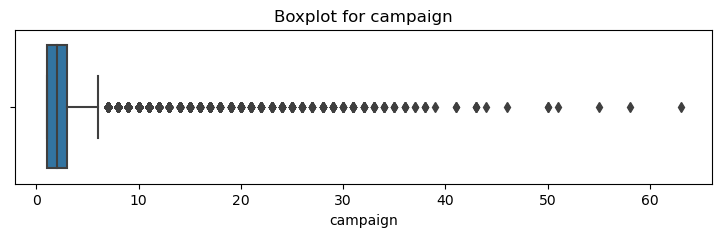

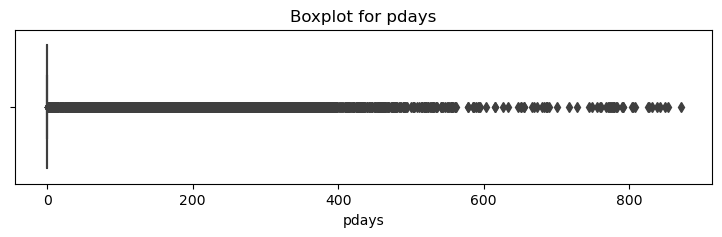

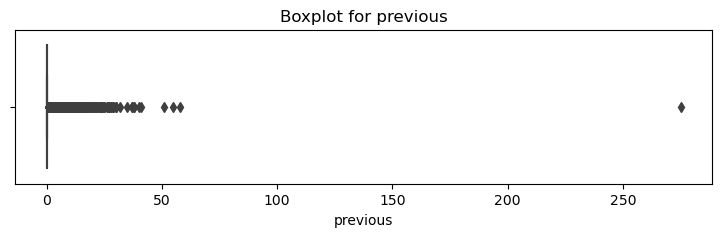

In [10]:
for column in df.select_dtypes(include = "number").columns:
    plt.figure(figsize=(9, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

# 2). Descriptive Statistics
Performing Central tendency(mean, median, mode)
perfoming measure of dispersion(std, variance, corr)

In [11]:
# Stastical summary for numeric column
new_var = df[["age","salary","balance","campaign","pdays","previous"]]
new_var.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45191.0,40.935651,10.619198,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# A). Derive summary statistics (mean, median, standard deviation) for relevant columns.

Mean For the numeric Variables :----
 age            40.935651
salary      57006.171065
balance      1362.272058
campaign        2.763841
pdays          40.197828
previous        0.580323
dtype: float64

Median For the numeric Variables :----
 age            39.0
salary      60000.0
balance       448.0
campaign        2.0
pdays          -1.0
previous        0.0
dtype: float64

Standard deviation For the numeric Variables :----
 age            10.619198
salary      32085.718415
balance      3044.765829
campaign        3.098021
pdays         100.128746
previous        2.303441
dtype: float64

Skweness For the numeric Variables----
 age          0.685001
salary       0.137829
balance      8.360308
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Kurtosis For the numeric Variables----
 age            0.320096
salary        -1.005143
balance      140.751547
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64


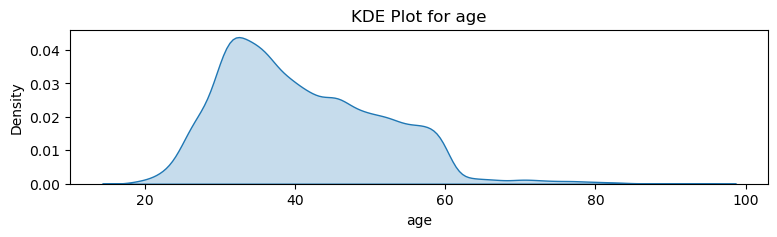

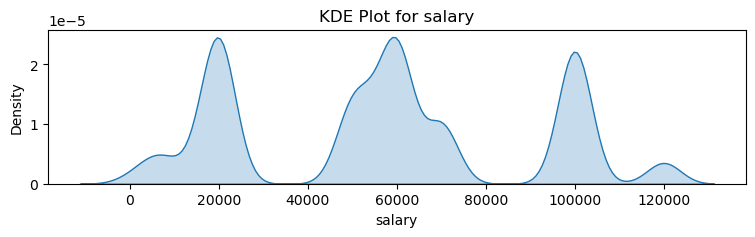

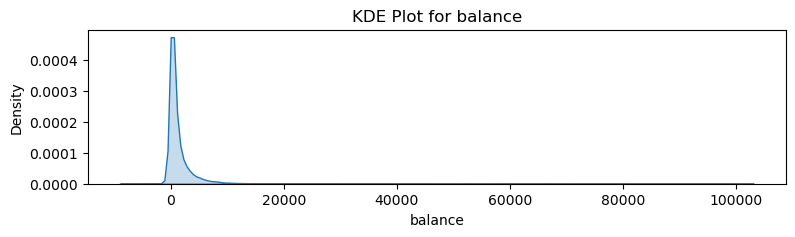

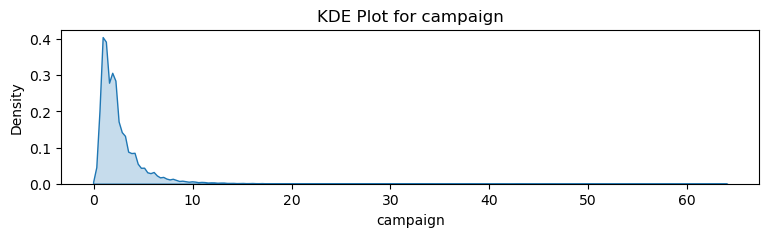

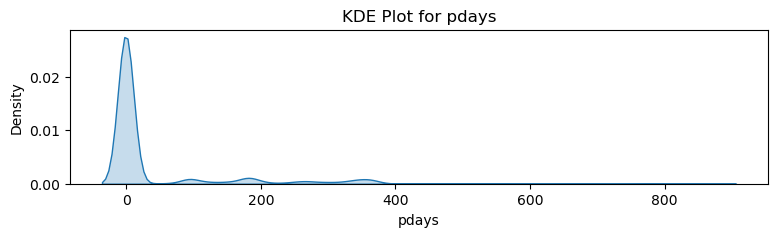

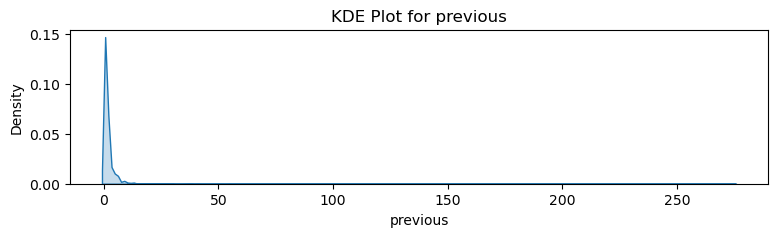

In [12]:
print('Mean For the numeric Variables :----\n',new_var.mean())
print('\nMedian For the numeric Variables :----\n',new_var.median())
print('\nStandard deviation For the numeric Variables :----\n',new_var.std())
print('\nSkweness For the numeric Variables----\n',new_var.skew())
print('\nKurtosis For the numeric Variables----\n',new_var.kurt())

# Filter for only numeric columns
numeric_columns = new_var.select_dtypes(include=['number']).columns

# Iterate over numeric columns and plot KDE
for column in numeric_columns:
    plt.figure(figsize=(9, 2))
    sns.kdeplot(data=new_var[column], fill=True)
    plt.title(f'KDE Plot for {column}')
    plt.show()

**B). Examine the distribution of the target variable, indicating responses to the term deposit campaign.***


In [13]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,2017-05-05



Perticular customer before targeted or not :
 targeted
yes    37091
no      8120
Name: count, dtype: int64


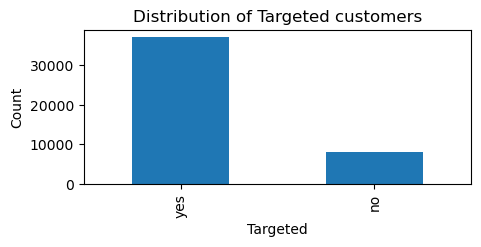

In [14]:
# Check the distribution
target_distribution = df["targeted"].value_counts()
print("\nPerticular customer before targeted or not :\n",target_distribution)

# Plotting the distribution
plt.figure(figsize=(5,2))
target_distribution.plot(kind='bar')
plt.title('Distribution of Targeted customers')
plt.xlabel('Targeted')
plt.ylabel('Count')
plt.show()

Interpretation:
If the target variable is balanced means a majority of "Yes" | "No" is equal, then the campaign might have had mixed success.
If the target variable is unbalanced means a majority of "Yes" resposes, then the campaign is successful.

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64


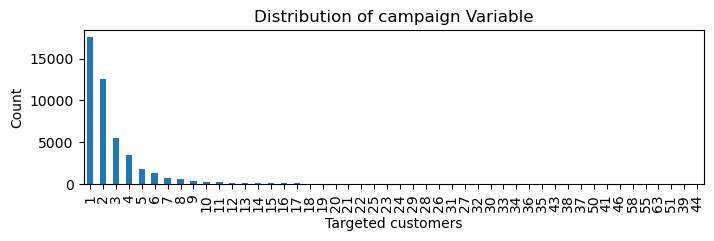

In [15]:
## This column is the number of campaign in which customer is contacted.
# These unique numbers are represents how many times customer is contacted through the campaign.

target_distributions = df["campaign"].value_counts()
print(target_distributions)

# Plotting the distribution
plt.figure(figsize=(8,2))
target_distributions.plot(kind='bar')
plt.title('Distribution of campaign Variable')
plt.xlabel('Targeted customers')
plt.ylabel('Count')
plt.show()

# 3). Univariate Analysis


Understanding Data Distribution
Identifying Patterns
Data Summarization

#A). Examine the distribution of individual key features, such as age, balance, and call duration.


In [17]:
# Split call_duration into two separate columns
df[['duration_int', 'sec_str']] = df['duration'].str.split(' ',expand=True)
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec


In [18]:
# Apply lambda function to convert duration to seconds
# Standardize the values to one unit
df['duration_in_second'] = df['duration'].apply(lambda x: float(x.split()[0]) * (60 if x.split()[1] == 'min' else 1))
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92 sec,1,-1,0,unknown,no,2017-05-05,92,sec,92.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,...,198 sec,1,-1,0,unknown,no,2017-05-05,198,sec,198.0


In [19]:
# Some statistical overview of the features.
print("Distribution of age :\n\n",df['age'].describe())
print("\nDistribution of balance :\n\n",df['balance'].describe())
print("\nDistribution of call_duaration :\n\n",df['duration_in_second'].describe())

Distribution of age :

 count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Distribution of balance :

 count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Distribution of call_duaration :

 count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration_in_second, dtype: float64


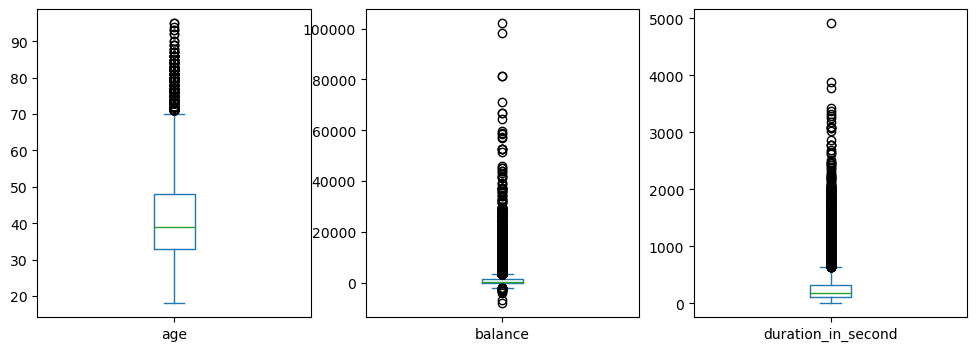

In [20]:
# Some distribution of boxplots for identifying outliers.
df[['age', 'balance', 'duration_in_second']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4))
plt.show()

# B). Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.


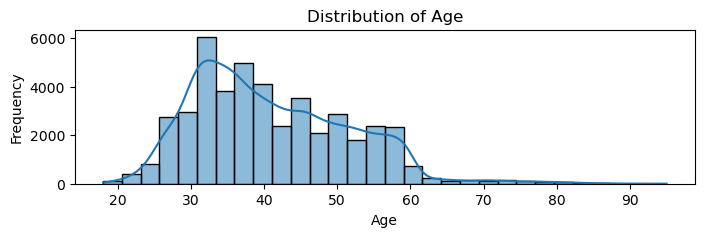

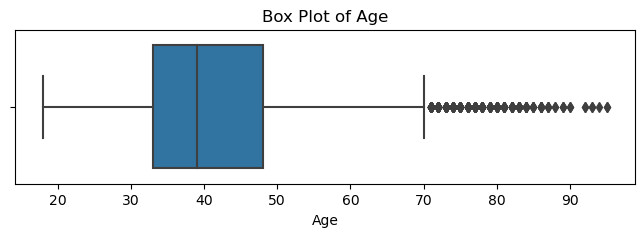

C:\Users\OMKAR UTTEKAR\AppData\Local\Temp\ipykernel_12776\271985495.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True)


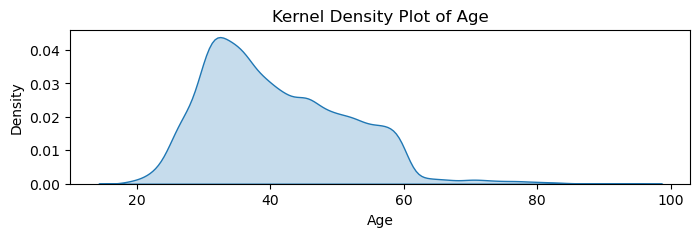

In [22]:
# Distribution of the age varible for visualization:

# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['age'], shade=True)
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

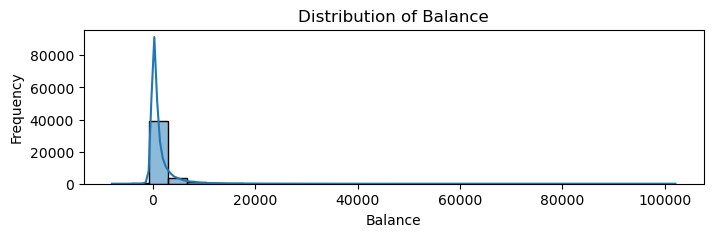

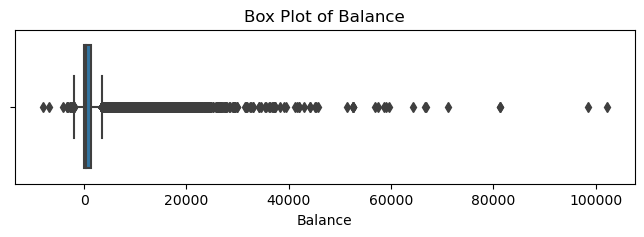

C:\Users\OMKAR UTTEKAR\AppData\Local\Temp\ipykernel_12776\1698224763.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['balance'], shade=True)


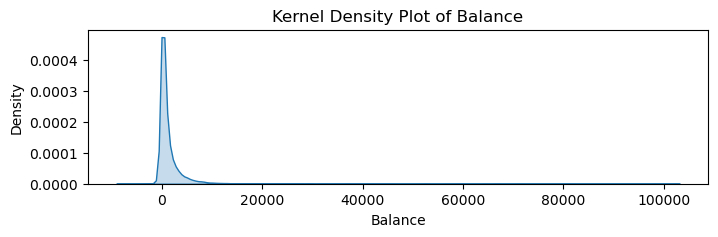

In [23]:
# Distribution of the balance varible for visualization: 
# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['balance'])
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['balance'], shade=True)
plt.title('Kernel Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

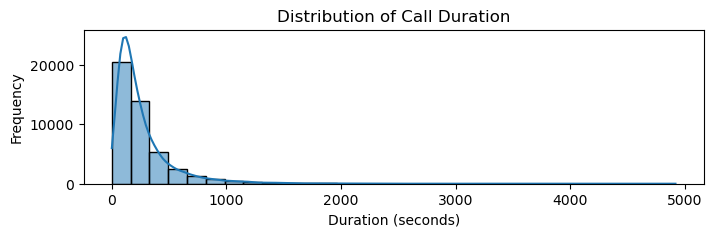

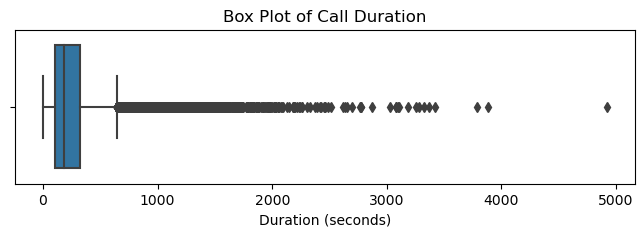

C:\Users\OMKAR UTTEKAR\AppData\Local\Temp\ipykernel_12776\2604076651.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration_in_second'], shade=True)


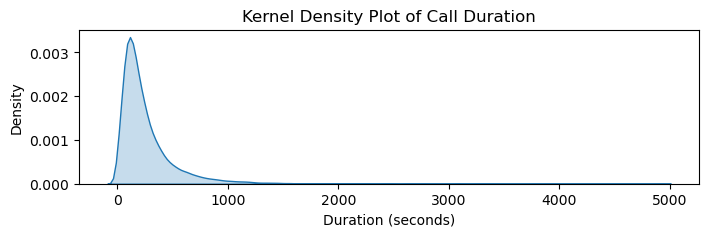

In [24]:
# Distribution of the call_duration varible for visualization: 
# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['duration_in_second'], kde=True, bins=30)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['duration_in_second'])
plt.title('Box Plot of Call Duration')
plt.xlabel('Duration (seconds)')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['duration_in_second'], shade=True)
plt.title('Kernel Density Plot of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.show()

# 4). Bivariate Analysis


In [25]:
df.head(4)


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,92 sec,1,-1,0,unknown,no,2017-05-05,92,sec,92.0


# A). Evaluate the relationship between independent variables and the target variable.


In [27]:
# Extract year and month from the date column
df['year'] = df['date'].dt.year
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017.0



Correlation with customers who has been targeted :
 age         0.113286
salary     -0.222868
balance    -0.040699
day        -0.012891
year             NaN
pdays      -0.004350
campaign   -0.002597
previous   -0.013253
year             NaN
dtype: float64


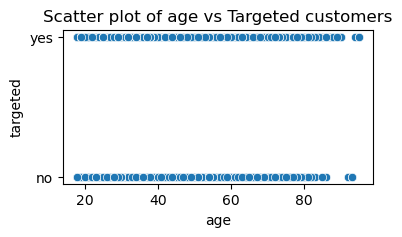

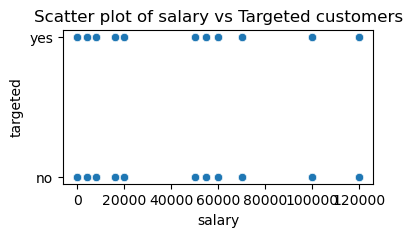

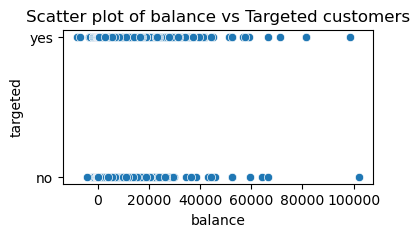

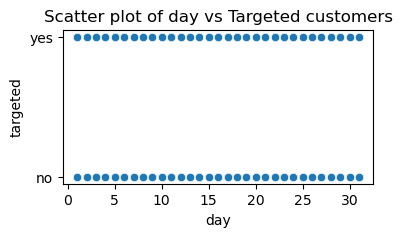

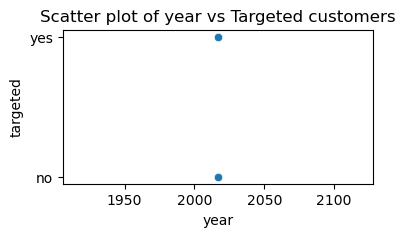

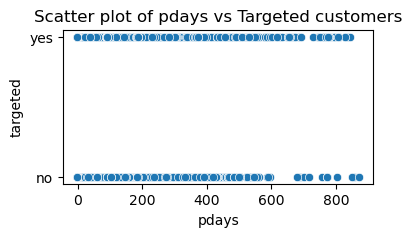

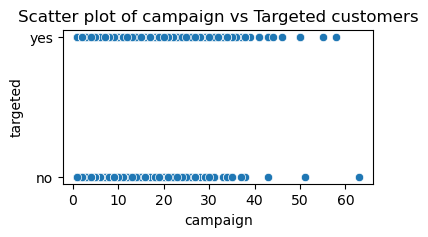

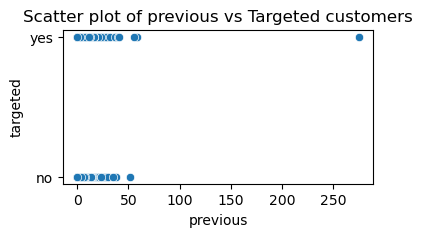

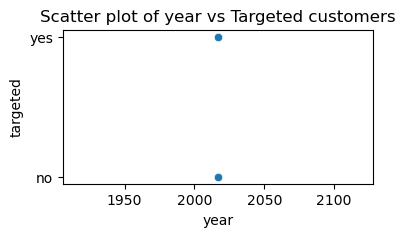


Box plot for numerical variables :



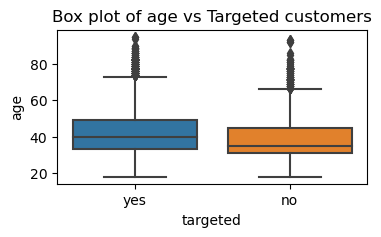

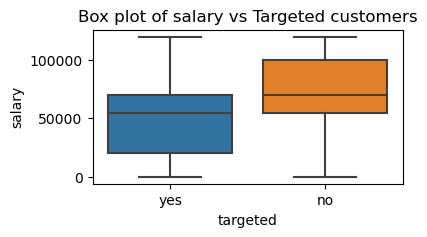

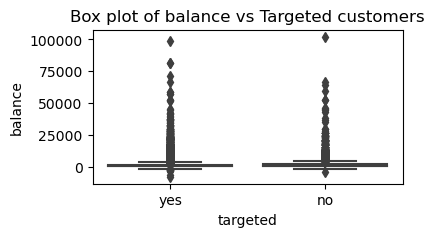

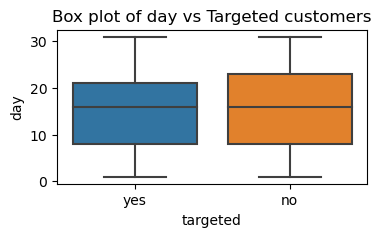

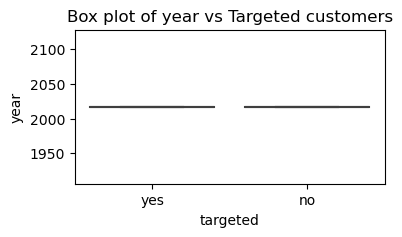

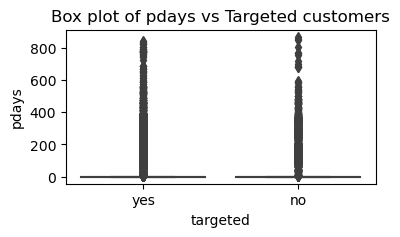

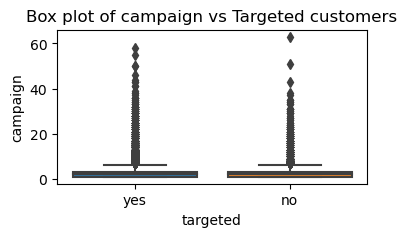

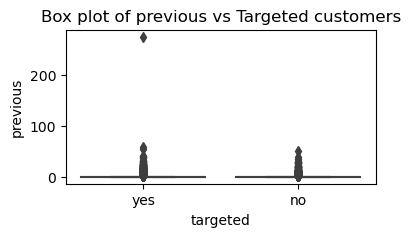

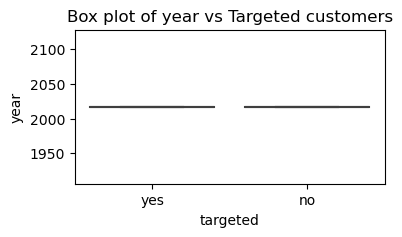

In [28]:
# Numerical columns
num_var = df[['age','salary','balance','day','month','year','pdays','campaign','previous','year']]
# List of numerical columns
numerical_cols = num_var.select_dtypes(include="number").columns

# Correlation with the target variable
correlations = df[numerical_cols].corrwith(df['targeted'].apply(lambda x: 1 if x == 'yes' else 0))
print("\nCorrelation with customers who has been targeted :\n",correlations)

# Scatter plot for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=df[col], y=df['targeted'])
    plt.title(f'Scatter plot of {col} vs Targeted customers')
    plt.show()

print("\nBox plot for numerical variables :\n")
# Box plot for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df['targeted'], y=df[col])
    plt.title(f'Box plot of {col} vs Targeted customers')
    plt.show()

In [30]:
# Spliting variable into two different variables
 
df['job'] = df['jobedu'].str.split(",").str[0]
df['education'] = df['jobedu'].str.split(",").str[1]
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,0,unknown,no,2017-05-05,261,sec,261.0,2017.0,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,0,unknown,no,2017-05-05,151,sec,151.0,2017.0,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,0,unknown,no,2017-05-05,76,sec,76.0,2017.0,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,0,unknown,no,2017-05-05,92,sec,92.0,2017.0,blue-collar,unknown


In [31]:
# Categorical columns
str_var = df[['marital','job','education','contact','default','housing','loan','response','poutcome']]


Crosstab for marital:
 response     no   yes
marital              
divorced   4582   622
married   24441  2754
single    10871  1911


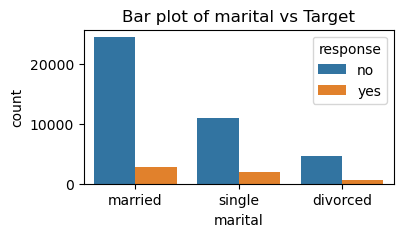


Crosstab for job:
 response         no   yes
job                      
admin.         4536   630
blue-collar    9019   708
entrepreneur   1363   123
housemaid      1130   109
management     8153  1301
retired        1747   516
self-employed  1389   186
services       3781   369
student         669   269
technician     6752   840
unemployed     1101   202
unknown         254    34


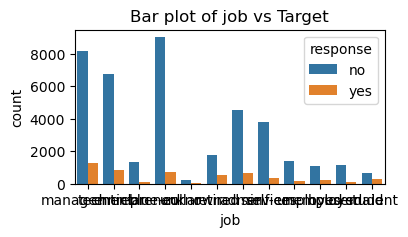


Crosstab for education:
 response      no   yes
education             
primary     6253   591
secondary  20740  2449
tertiary   11297  1995
unknown     1604   252


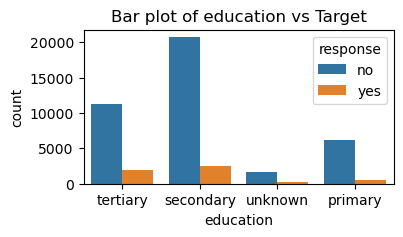


Crosstab for contact:
 response      no   yes
contact               
cellular   24900  4367
telephone   2514   390
unknown    12480   530


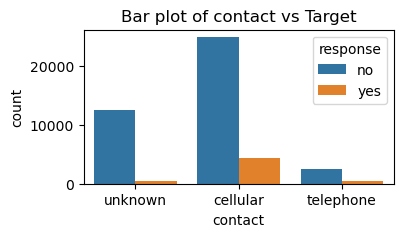


Crosstab for default:
 response     no   yes
default              
no        39131  5235
yes         763    52


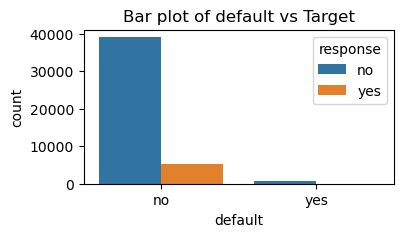


Crosstab for housing:
 response     no   yes
housing              
no        16716  3353
yes       23178  1934


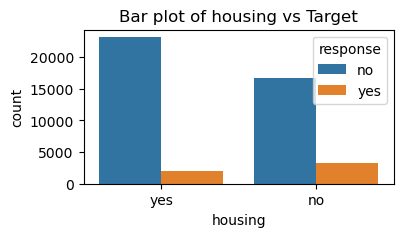


Crosstab for loan:
 response     no   yes
loan                 
no        33140  4803
yes        6754   484


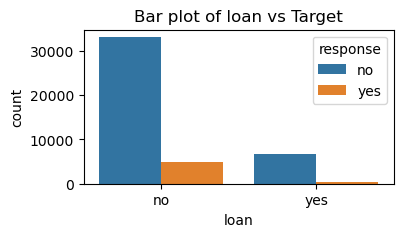


Crosstab for poutcome:
 response     no   yes
poutcome             
failure    4279   618
other      1532   307
success     532   978
unknown   33551  3384


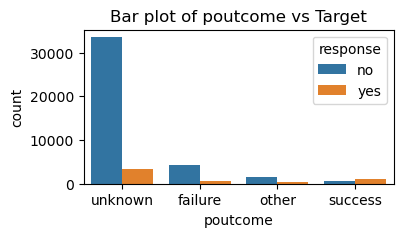

In [32]:
# List of categorical columns
categorical_cols = str_var.select_dtypes(include=['object']).columns

# Crosstabs and Bar plots for categorical variables
for col in categorical_cols:
    if col != 'response':
        crosstab = pd.crosstab(df[col], df['response'])
        print(f'\nCrosstab for {col}:\n', crosstab)
        
        # Bar plot
        plt.figure(figsize=(4, 2))
        sns.countplot(x=col, hue='response', data=df)
        plt.title(f'Bar plot of {col} vs Target')
        plt.show()

# B). Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.


In [33]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,0,unknown,no,2017-05-05,261,sec,261.0,2017.0,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,0,unknown,no,2017-05-05,151,sec,151.0,2017.0,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,0,unknown,no,2017-05-05,76,sec,76.0,2017.0,entrepreneur,secondary
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,0,unknown,no,2017-05-05,92,sec,92.0,2017.0,blue-collar,unknown


# Bar Chart:
Analyze individual categorical features against the target variable

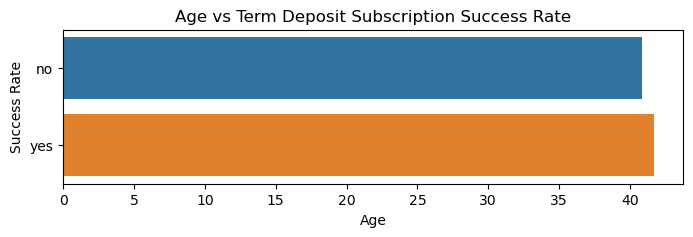

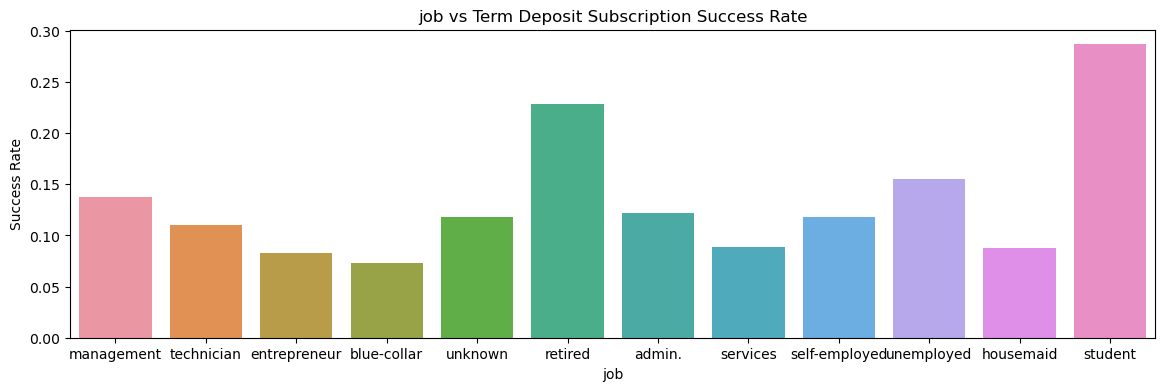

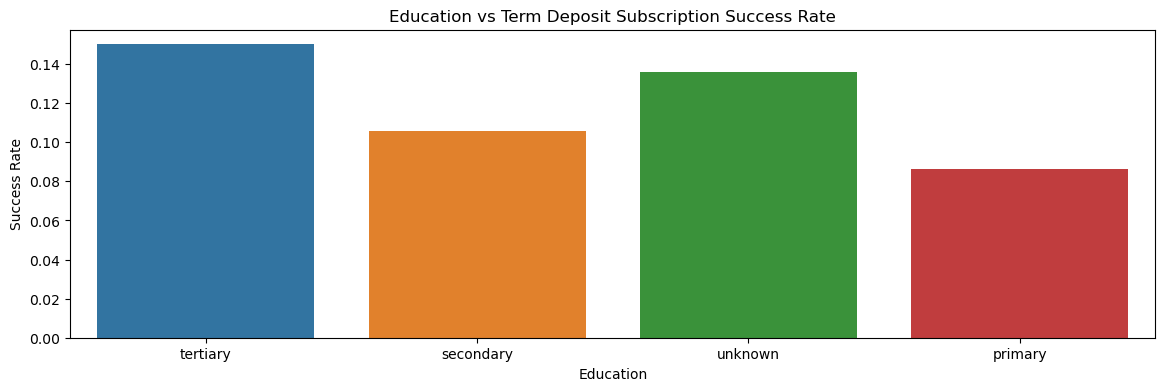

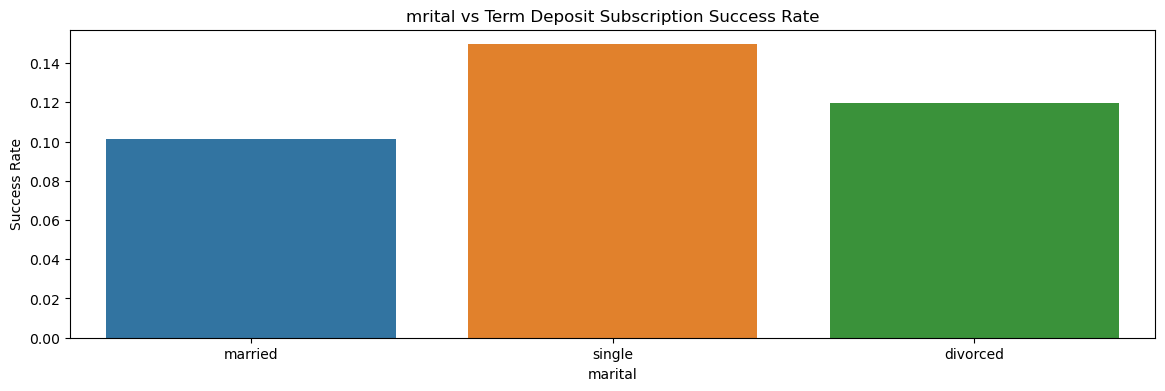

In [36]:
# Convert 'yes' and 'no' to binary for easier analysis
df['Response'] = df['response'].map({'yes': 1, 'no': 0})

# Plot the bar chart for Age vs Term Deposit
plt.figure(figsize=(8, 2))
sns.barplot(x='age', y='response', data=df, errorbar=None)
plt.title('Age vs Term Deposit Subscription Success Rate')
plt.xlabel('Age')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for job types vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='job', y='Response', data=df, errorbar=None)
plt.title('job vs Term Deposit Subscription Success Rate')
plt.xlabel('job')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for education vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='education', y='Response', data=df, errorbar=None)
plt.title('Education vs Term Deposit Subscription Success Rate')
plt.xlabel('Education')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for marital status vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='marital', y='Response', data=df, errorbar=None)
plt.title('mrital vs Term Deposit Subscription Success Rate')
plt.xlabel('marital')
plt.ylabel('Success Rate')
plt.show()

# Stacked Bar Chart:
Show the distribution of success and failure within each category.

<Figure size 400x400 with 0 Axes>

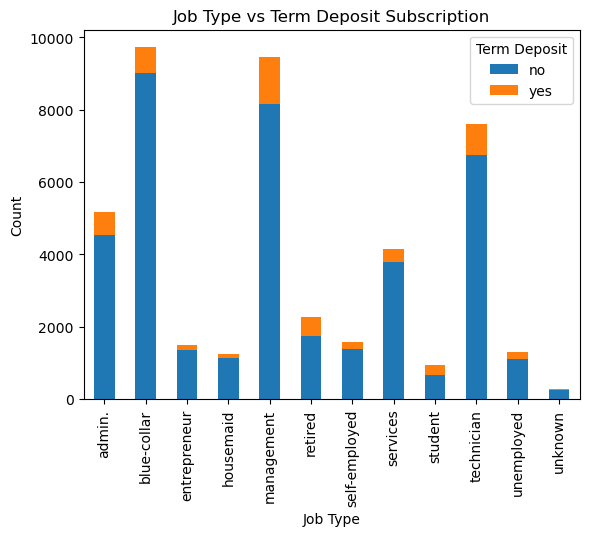

<Figure size 400x400 with 0 Axes>

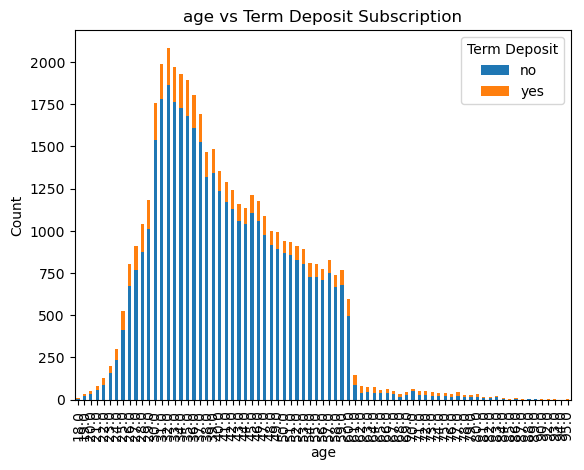

<Figure size 400x400 with 0 Axes>

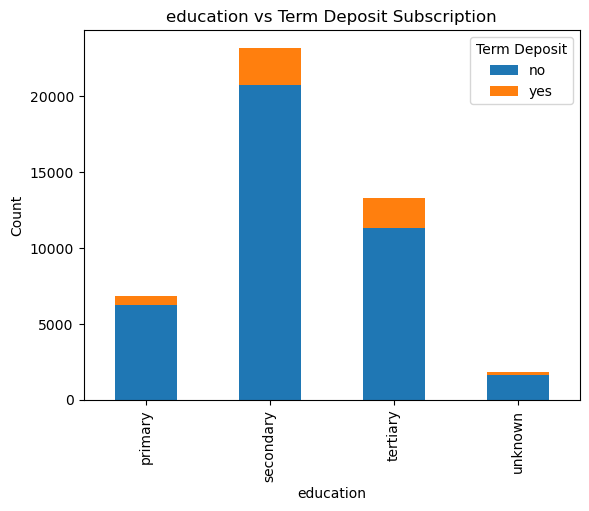

<Figure size 400x400 with 0 Axes>

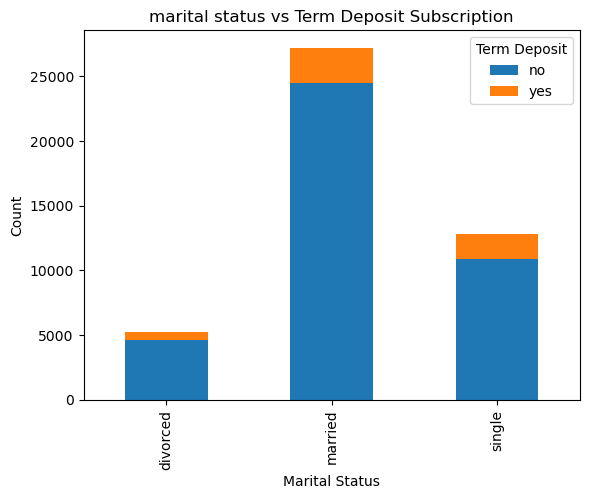

In [37]:
# Job Type vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['job'], df['response']).plot(kind='bar', stacked=True)
plt.title('Job Type vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Age vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['age'], df['response']).plot(kind='bar', stacked=True)
plt.title('age vs Term Deposit Subscription')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Education Type vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['education'], df['response']).plot(kind='bar', stacked=True)
plt.title('education vs Term Deposit Subscription')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Marital Status vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['marital'], df['response']).plot(kind='bar', stacked=True)
plt.title('marital status vs Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Heatmap:
Correlation Between Age, Education, and Term Deposit

For numerical variables, we can use a heatmap to show the correlation between different features, such as age, education, and the success of the term deposit campaign.

In [38]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,unknown,no,2017-05-05,261,sec,261.0,2017.0,management,tertiary,0.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,unknown,no,2017-05-05,151,sec,151.0,2017.0,technician,secondary,0.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,unknown,no,2017-05-05,76,sec,76.0,2017.0,entrepreneur,secondary,0.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,unknown,no,2017-05-05,92,sec,92.0,2017.0,blue-collar,unknown,0.0


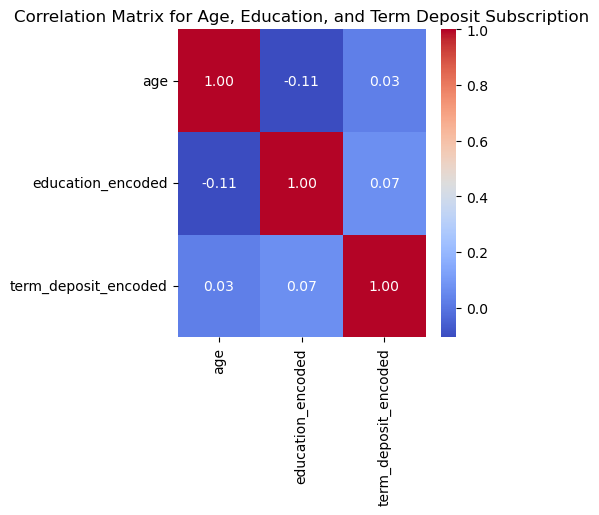

In [39]:
# Convert categorical education and term_deposit into numerical variables
df['education_encoded'] = df['education'].astype('category').cat.codes
df['term_deposit_encoded'] = df['response'].map({'yes': 1, 'no': 0})

# Create a correlation matrix
corr_matrix = df[['age', 'education_encoded', 'term_deposit_encoded']].corr()

# Plot heat map
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',cbar=True)
plt.title('Correlation Matrix for Age, Education, and Term Deposit Subscription')
plt.show()

# Job Type and Marital Status:
Stacked Bar Chart
We can also analyze the joint effect of two categorical features like job type and marital status.

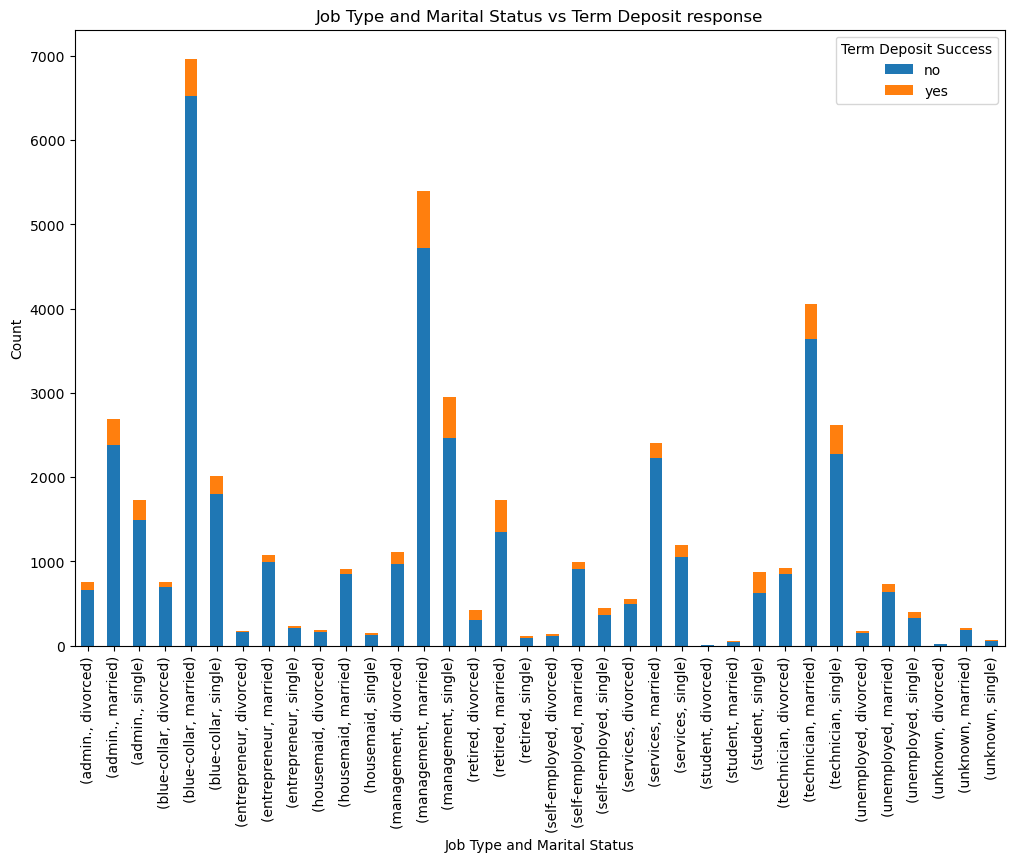

In [41]:
# Crosstab for Job Type and Marital Status vs Term Deposit
job_marital_vs_term = pd.crosstab([df['job'], df['marital']], df['response'])

# Plot stacked bar chart
job_marital_vs_term.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Job Type and Marital Status vs Term Deposit response')
plt.xlabel('Job Type and Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Success')
plt.show()

# 5). Categorical Variables Analysis

In [42]:
# Job distribution
print("\nDistribution of Job variable :\n\n",df['job'].value_counts())

# Education distribution
print("\nDistribution of Education variable :\n\n",df['education'].value_counts())

# Marital status distribution
print("\nDistribution of Marital status variable :\n\n",df['marital'].value_counts())


Distribution of Job variable :

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Distribution of Education variable :

 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Distribution of Marital status variable :

 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64



Visualizing the Distribution :




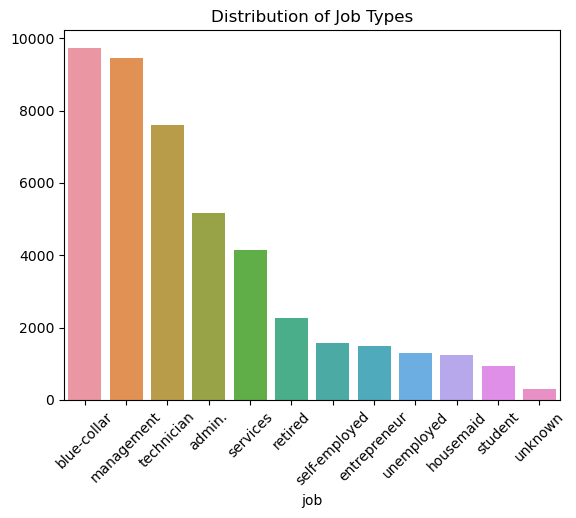

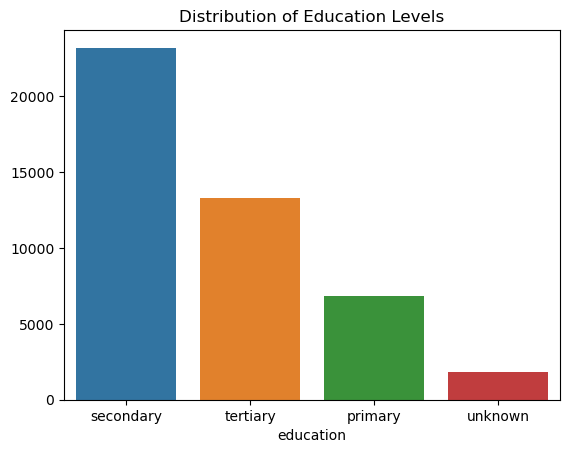

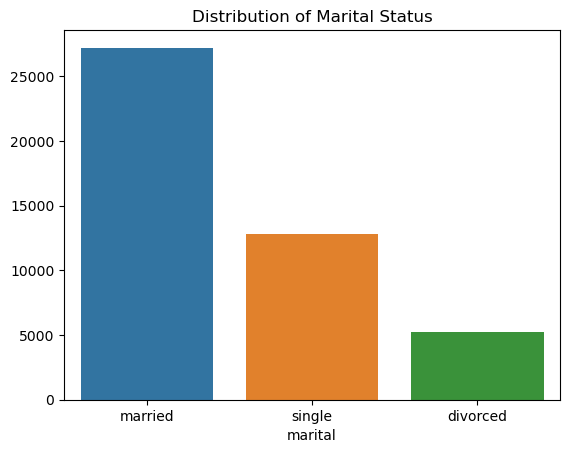

In [43]:
print("\nVisualizing the Distribution :\n\n")
# Distribution of job type
job_counts = df['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Job Types')
plt.show()

# Distribution of education
education_counts = df['education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Distribution of Education Levels')
plt.show()

# Distribution of marital status
marital_counts = df['marital'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Distribution of Marital Status')
plt.show()

# B). Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

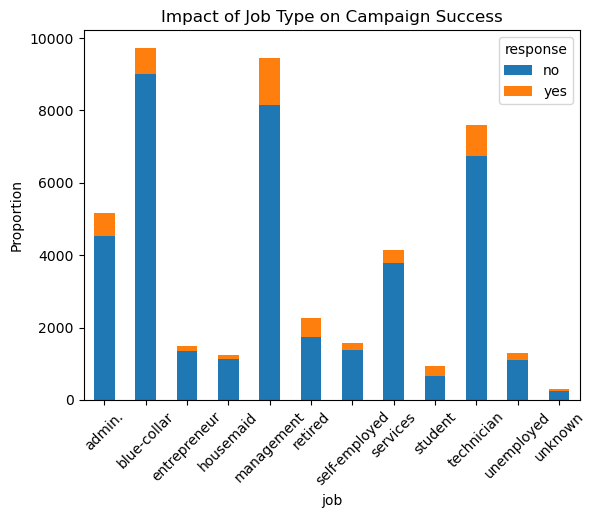

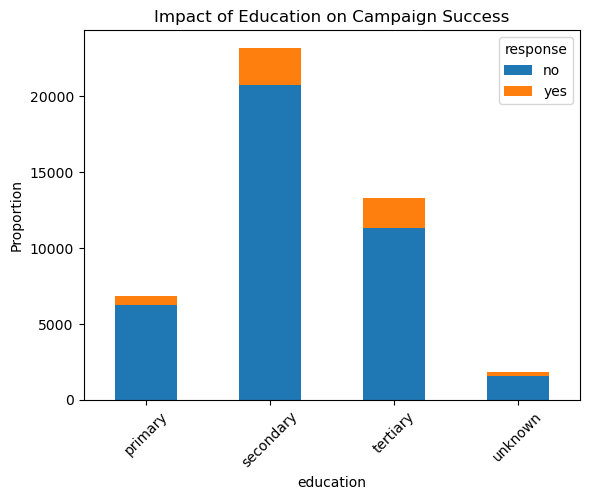

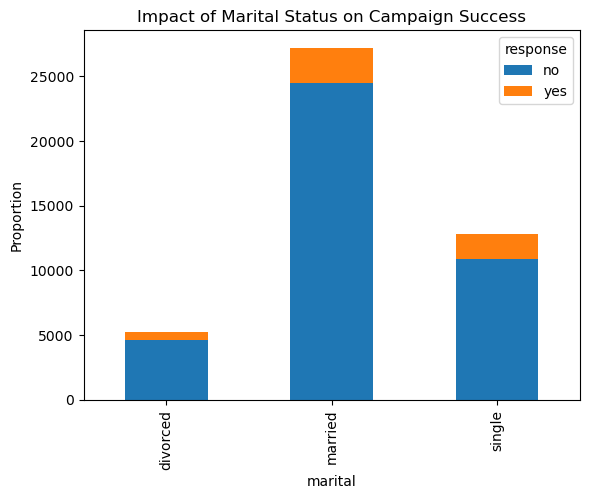

In [44]:
# Impact of job type on campaign success
job_success = df.groupby('job')['response'].value_counts().unstack()
job_success.plot(kind='bar', stacked=True)
plt.title('Impact of Job Type on Campaign Success')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Impact of education on campaign success
education_success = df.groupby('education')['response'].value_counts().unstack()
education_success.plot(kind='bar', stacked=True)
plt.title('Impact of Education on Campaign Success')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Impact of marital status on campaign success
marital_success = df.groupby('marital')['response'].value_counts().unstack()
marital_success.plot(kind='bar', stacked=True)
plt.title('Impact of Marital Status on Campaign Success')
plt.ylabel('Proportion')
plt.show()

# 6). Temporal Analysis

In [45]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,2017-05-05,261,sec,261.0,2017.0,management,tertiary,0.0,2,0.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,2017-05-05,151,sec,151.0,2017.0,technician,secondary,0.0,1,0.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,2017-05-05,76,sec,76.0,2017.0,entrepreneur,secondary,0.0,1,0.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,2017-05-05,92,sec,92.0,2017.0,blue-collar,unknown,0.0,3,0.0


# A). Investigate temporal patterns in the success of the campaign over time.


In [46]:
# Extract month and day_of_week from datetime variable
df['Month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['month_name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

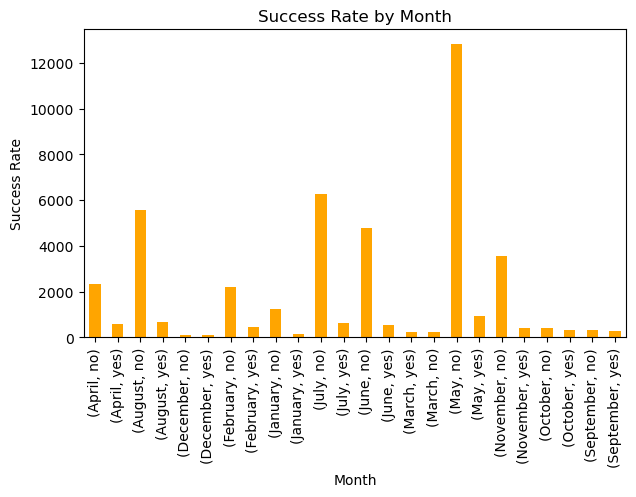

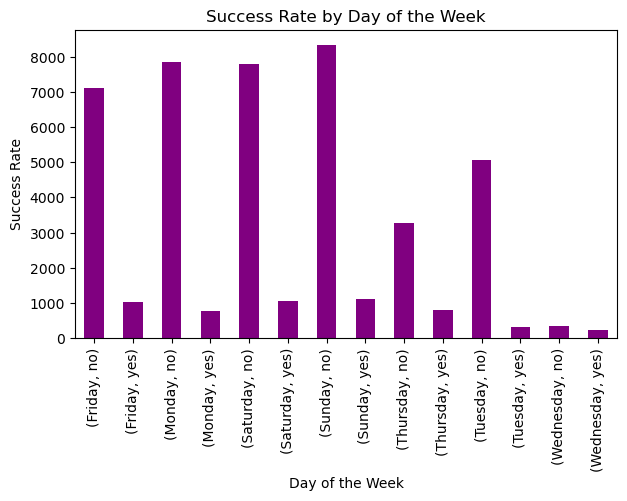

In [48]:
# Group by month and calculate success rate
monthly_success_rate = df.groupby('month_name')['response'].value_counts()

# Visualize the success rate by month
plt.figure(figsize=(7,4))
monthly_success_rate.plot(kind='bar', color='orange')
plt.title('Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.show()

# Group by day of the week and calculate success rate
weekly_success_rate = df.groupby('day_of_week')['response'].value_counts()

# Visualize the success rate by day of the week
plt.figure(figsize=(7,4))
weekly_success_rate.plot(kind='bar', color='purple')
plt.title('Success Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate')
plt.show()

# B). Analyze if specific months or days exhibit superior campaign performance.

Aggregation of the data to analyze the performance of the campaign based on the target column.


In [49]:
# Convert response to yes/no = 1/0, for calculating success rate
df['success_rate'] = df['response'].map({'yes': 1, 'no': 0})

In [50]:
# 'Response' is the column indicating campaign success (e.g., 1 for success, 0 for failure)
# Group by 'month' and/or 'day' and calculate the success rate
monthly_performance = df.groupby(df['date'].dt.month)['success_rate'].mean().reset_index()
daily_performance = df.groupby(df['date'].dt.day)['success_rate'].mean().reset_index()

# Rename columns for clarity
monthly_performance.columns = ['Month', 'Success_Rate']
daily_performance.columns = ['Day', 'Success_Rate']

print("\nGrouped day by mean of the success rate :\n",daily_performance)
print("\nGrouped month with the mean of the success rate :\n",monthly_performance)


Grouped day by mean of the success rate :
      Day  Success_Rate
0    1.0      0.280374
1    2.0      0.140867
2    3.0      0.164804
3    4.0      0.159501
4    5.0      0.112743
5    6.0      0.093734
6    7.0      0.086549
7    8.0      0.109358
8    9.0      0.114891
9   10.0      0.231358
10  11.0      0.121786
11  12.0      0.151780
12  13.0      0.152628
13  14.0      0.113945
14  15.0      0.139918
15  16.0      0.135881
16  17.0      0.091003
17  18.0      0.097349
18  19.0      0.069635
19  20.0      0.069869
20  21.0      0.099308
21  22.0      0.169435
22  23.0      0.134472
23  24.0      0.138702
24  25.0      0.158711
25  26.0      0.112077
26  27.0      0.134168
27  28.0      0.078185
28  29.0      0.074010
29  30.0      0.173163
30  31.0      0.071651

Grouped month with the mean of the success rate :
     Month  Success_Rate
0     1.0      0.101284
1     2.0      0.165974
2     3.0      0.518908
3     4.0      0.196996
4     5.0      0.067259
5     6.0      0.102083


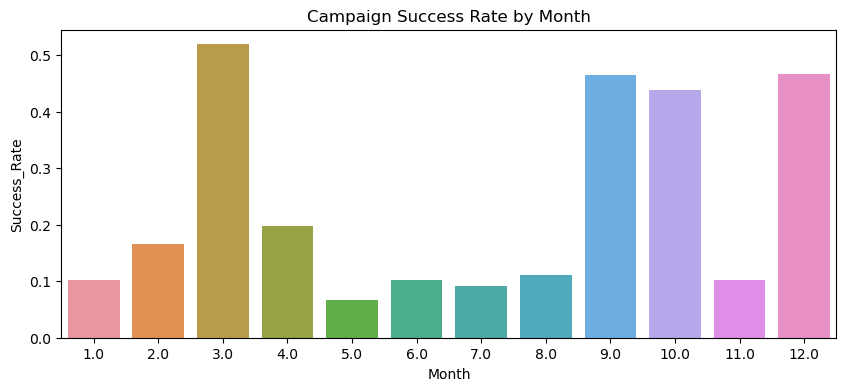

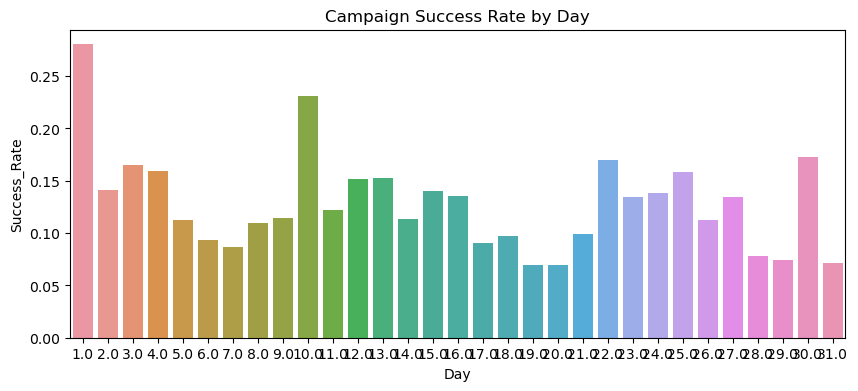

In [51]:
# Monthly performance plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Month', y='Success_Rate', data=monthly_performance)
plt.title('Campaign Success Rate by Month')
plt.show()

# Daily performance plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Day', y='Success_Rate', data=daily_performance)
plt.title('Campaign Success Rate by Day')
plt.show()

# 7). Feature Engineering


A). Introduce new features that may enhance prediction, such as creating age groups or income categories.


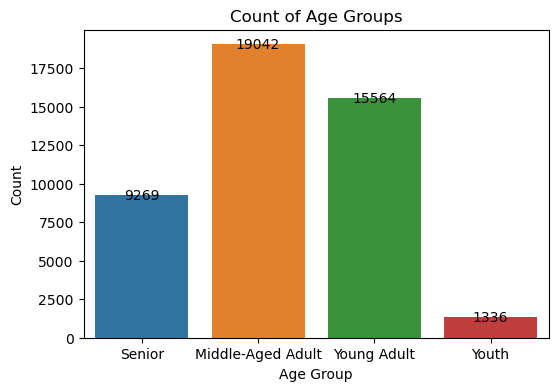

In [53]:
# Assuming your DataFrame is called df and there's an 'age' column
def categorize_age(age):
    if age < 26:
        return 'Youth'
    elif 26 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

plt.figure(figsize=(6,4))
ax = sns.countplot(x="age_group", data=df)

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

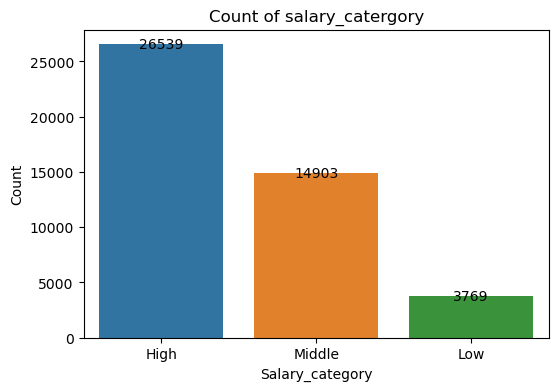

In [54]:
def categorize_income(salary):
    if salary < 20000:
        return 'Low'
    elif 20000 <= salary <= 50000:
        return 'Middle'
    else:
        return 'High'

df['salary_category'] = df['salary'].apply(categorize_income)

plt.figure(figsize=(6,4))
ax = sns.countplot(x="salary_category", data=df)

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of salary_catergory")
plt.xlabel("Salary_category")
plt.ylabel("Count")
plt.show()

In [55]:
def categorize_duration(duration_in_second):
    if duration_in_second < 100:
        return 'Short'
    elif 100 <= duration_in_second <= 300:
        return 'Medium'
    else:
        return 'Long'

df['duration_in_second_category'] = df['duration_in_second'].apply(categorize_duration)

# B). Apply encoding techniques to transform categorical variables if necessary.


In [57]:
# Copy of the variables [job and eduacation]
df['Job'] = df['job'].copy()
df['Education'] = df['education'].copy()
df['Marital'] = df['marital'].copy()
df['Contact'] = df['contact'].copy()
df['Poutcome'] = df['poutcome'].copy()
df['day_of_week_1'] = df['day_of_week'].copy()
df.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,age_group,salary_category,duration_in_second_category,contact_category,Job,Education,Marital,Contact,Poutcome,day_of_week_1
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,...,Senior,High,Medium,Few Contacts,management,tertiary,married,unknown,unknown,Friday
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,...,Middle-Aged Adult,High,Medium,Few Contacts,technician,secondary,single,unknown,unknown,Friday


In [62]:
# groupby function for calculating high-cardinality in job category variable
df['Job'].value_counts().reset_index(name='Counts')

,Job,Counts
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


In [63]:
# groupby function for calculating high-cardinality in education category variable
df['Education'].value_counts().reset_index(name='Counts')

,Education,Counts
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


# 8). Correlation Analysis


# A). Examine correlations between independent variables to identify multicollinearity.


In [65]:
# Creating numeric independent variable
x = df[['age','salary','balance','campaign','duration_in_second']]

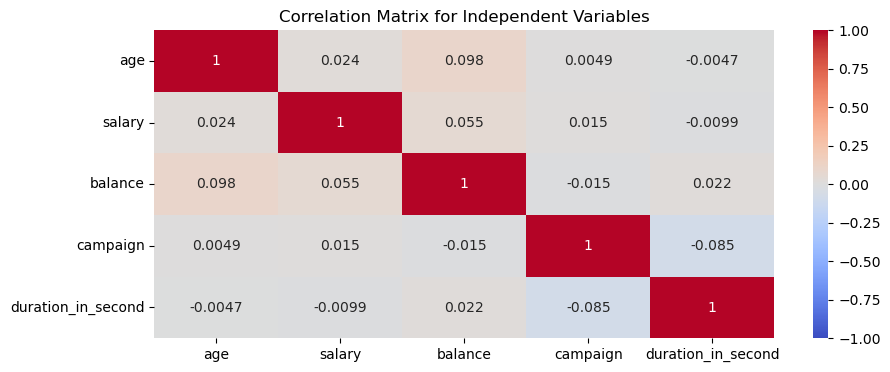

Highly correlated features (possible multicollinearity):
Empty DataFrame
Columns: [age, salary, balance, campaign, duration_in_second]
Index: []


In [67]:
# Calculate the correlation matrix
correlation_matrix = x.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Independent Variables")
plt.show()

# Identify multicollinearity (print highly correlated features)
# Multicollinearity exists when the correlation between two features > 0.8 or < -0.8
high_corr = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1.0)]
print("Highly correlated features (possible multicollinearity):")
print(high_corr.dropna(how='all'))

# B). Evaluate how correlated features may influence the target variable.


In [68]:
# Copy the response of the customer as a target_var and converting in binary number(1 for 'yes' and 0 for 'no')
df['target_var'] = df['response'].copy()
df['target_var'] = df['target_var'].map({'yes': 1, 'no': 0})

In [69]:

# creating new var containing integer value
y = df[['age','salary','balance','campaign','duration_in_second','target_var']]

# Convert categorical columns into numeric format using one-hot encoding
df_encoded = pd.get_dummies(y, drop_first=True)  # Drop first to avoid multicollinearity

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation of features with the target
print(correlation_matrix['target_var'].sort_values(ascending=False))

target_var            1.000000
duration_in_second    0.394665
balance               0.052850
age                   0.025076
salary                0.020042
campaign             -0.073176
Name: target_var, dtype: float64


In [70]:
# Set a correlation threshold, for example, >0.5 or <-0.5
threshold = 0.5

# Filter features with strong correlation to the target
strong_corr = correlation_matrix['target_var'][(correlation_matrix['target_var'] > threshold) | (correlation_matrix['target_var'] < -threshold)]
print("Features strongly correlated with the target:\n", strong_corr)

print('\nThere are no any int variable to identifying the relationship with the target_var.')

Features strongly correlated with the target:
 target_var    1.0
Name: target_var, dtype: float64

There are no any int variable to identifying the relationship with the target_var.


# Check for Multicollinearity Between Features
Correlated features among themselves can cause multicollinearity. we can look for pairs of features that are strongly correlated to each other (e.g., correlation > 0.8).

In [73]:
# Check correlations between features
feature_corr_matrix = y.drop('target_var', axis=1).corr()

# Filter pairs of features that are highly correlated
high_corr_features = feature_corr_matrix.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1]  # Remove self-correlations
high_corr_features = high_corr_features[high_corr_features > 0.8]  # Keep only highly correlated pairs
print("Highly correlated feature pairs:\n", high_corr_features)

print('\nThere are no any variable which have highly correlated pairs.')

Highly correlated feature pairs:
 Series([], dtype: float64)

There are no any variable which have highly correlated pairs.


# Visualizing Correlation
Although this step uses some visualization, pandas itself can produce a simple heatmap of the correlations.

In [72]:
# Correlation matrix heatmap using pandas' built-in styling
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,salary,balance,campaign,duration_in_second,target_var
age,1.000000,0.024374,0.097755,0.004851,-0.004658,0.025076
salary,0.024374,1.000000,0.055469,0.015005,-0.009937,0.020042
balance,0.097755,0.055469,1.000000,-0.014578,0.021560,0.052850
campaign,0.004851,0.015005,-0.014578,1.000000,-0.084570,-0.073176
duration_in_second,-0.004658,-0.009937,0.021560,-0.084570,1.000000,0.394665
target_var,0.025076,0.020042,0.052850,-0.073176,0.394665,1.000000


# 9). Outlier Detection and Handling


In [74]:
# Creating new data frame of only integer column
num_df = df[['age','balance','duration_in_second','campaign','pdays','previous']]

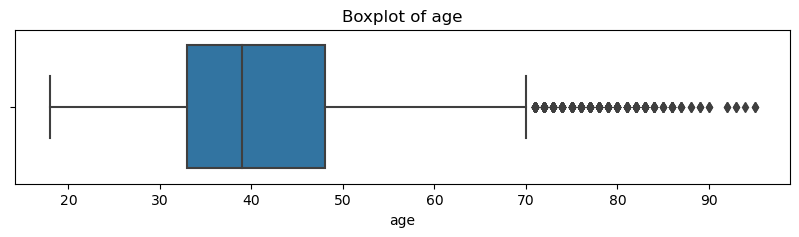

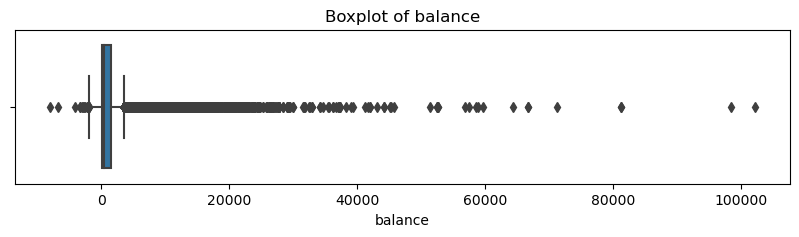

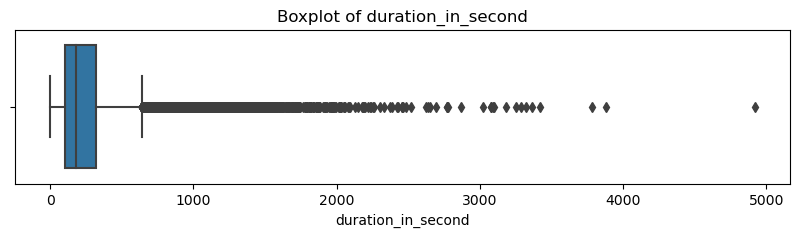

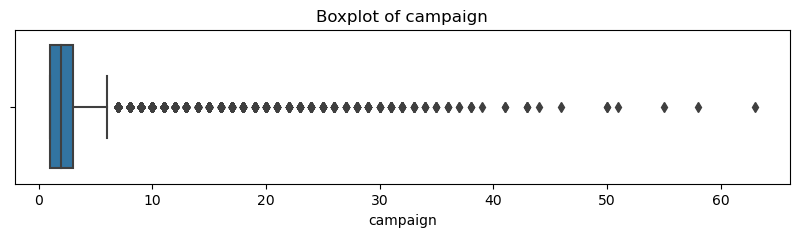

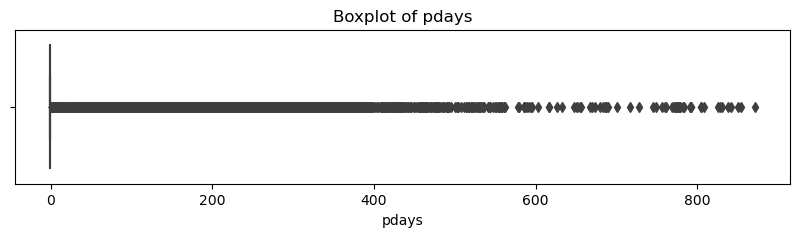

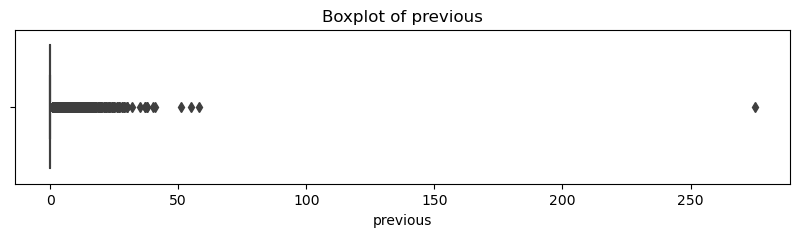

In [75]:
# Visualizing outliers in a numerical column

for column in num_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10,2))
    
    # Boxplot for each numerical column
    sns.boxplot(data=num_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

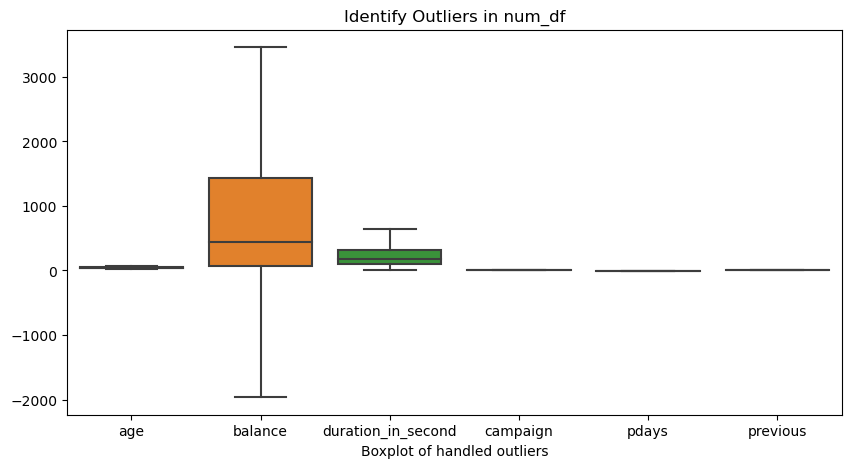

In [76]:
## Identifying outliers and handle the outliers
Q1 = df[['age','balance','duration_in_second','campaign','pdays','previous']].quantile(0.25)
Q3 = df[['age','balance','duration_in_second','campaign','pdays','previous']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# where clause : if condition is true then replace the value if not true then let it be.
df[['age','balance','duration_in_second','campaign','pdays','previous']] = np.where(df[['age','balance','duration_in_second','campaign','pdays','previous']] > upper_bound, upper_bound, df[['age','balance','duration_in_second','campaign','pdays','previous']])
df[['age','balance','duration_in_second','campaign','pdays','previous']] = np.where(df[['age','balance','duration_in_second','campaign','pdays','previous']] < lower_bound, lower_bound, df[['age','balance','duration_in_second','campaign','pdays','previous']])
#df[['age','balance','duration_in_second','campaign','pdays','previous']]
plt.figure(figsize=(10,5))
sns.boxplot(df[['age','balance','duration_in_second','campaign','pdays','previous']])
plt.title("Identify Outliers in num_df")
plt.xlabel("Boxplot of handled outliers")
plt.show()